<a href="https://colab.research.google.com/github/Hemapriya-aids/machine-learining-internship/blob/main/task3_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# Step 2: Load and preprocess the dataset
# We'll use the CIFAR-10 dataset (contains 10 categories of images)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to range 0-1 for faster training
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check dataset shape
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [3]:
# Step 3: Define the CNN model architecture
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(64, (3,3), activation='relu'),

    # Flatten the output to feed into dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer (10 classes)
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Step 5: Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.3537 - loss: 1.7329 - val_accuracy: 0.5202 - val_loss: 1.3275
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5687 - loss: 1.2051 - val_accuracy: 0.6096 - val_loss: 1.1066
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.6347 - loss: 1.0387 - val_accuracy: 0.6546 - val_loss: 0.9807
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.6732 - loss: 0.9313 - val_accuracy: 0.6651 - val_loss: 0.9503
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 51ms/step - accuracy: 0.7024 - loss: 0.8485 - val_accuracy: 0.6869 - val_loss: 0.9003
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7296 - loss: 0.7787 - val_accuracy: 0.6937 - val_loss: 0.8783
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7435 - loss: 0.7332 - val_accuracy: 0.6909 - val_loss: 0.8984
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7572 -

In [6]:
# Step 6: Evaluate performance on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")



313/313 - 4s - 12ms/step - accuracy: 0.7006 - loss: 0.8809

Test Accuracy: 0.7006


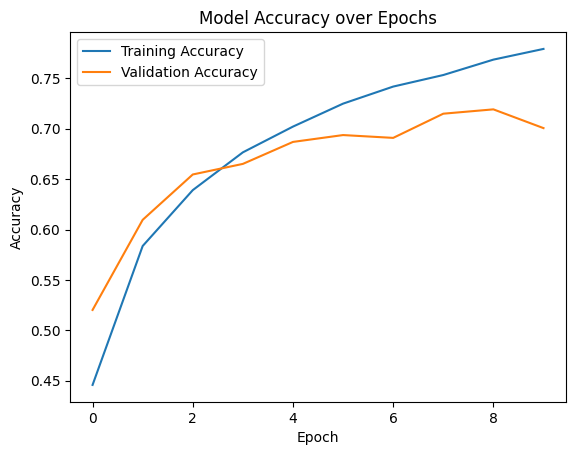

In [5]:
# Step 7: Visualize training performance
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


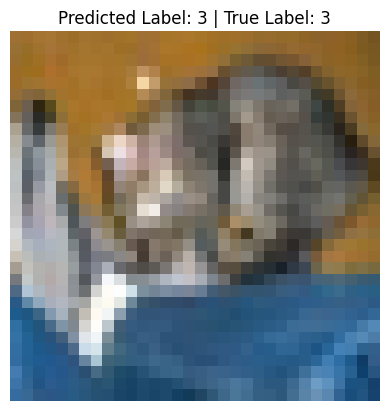

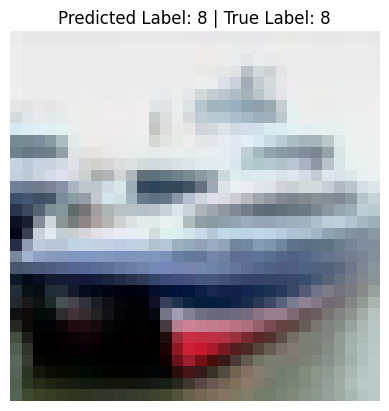

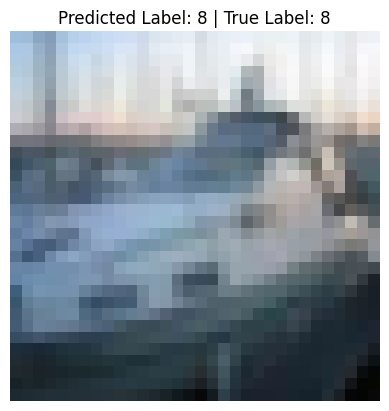

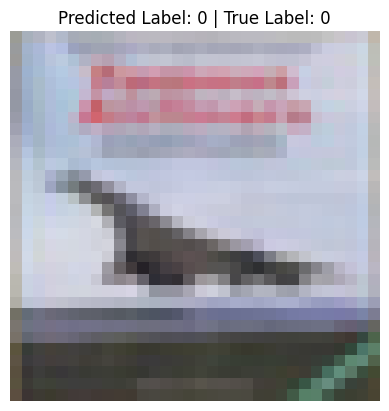

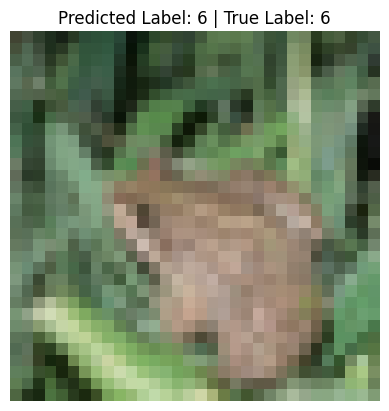

In [7]:
# Step 8: Make sample predictions
# Convert model output (logits) to probabilities using softmax
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:5])

# Display first 5 predictions
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted Label: {predictions[i].argmax()} | True Label: {y_test[i][0]}")
    plt.axis('off')
    plt.show()

